# Introduction to Machine Learning with PyTorch

*by Jonathan Frawley*

<img style="text-align: center;" src="https://www.oreilly.com/library/view/deep-learning-for/9781788295628/assets/43dc9d10-cf03-456b-be23-ec2726f39463.png" width="200"/>

## Before we begin - Format for the course

* This course is due to run for 2 hours so do make sure you’re comfortable and have a drink with you.
* There will be a break from 10:50-11:00
* You can also contribute to the meeting using the chat panel.
* Please set your microphone to mute when you are not talking.
* Course link: <https://bit.ly/jf_ml_course>

# Who am I?
 - 10 years of software development experience in industry (Python and Scala mostly)
 - Research Software Engineer in Advanced Research Computing
 - Part-time PhD in Computer Science in Deep Learning
 - Colleagues from ARC on hand to help

# Icebreaker 

 - Say briefly why you joined this course today in chat
 - If you have questions throughout the day, please put it into chat

# Basic information about today
 - Mixture of lectures and hands on exercises. 
 - All materials are open source, including slides.
 - These will remain available after the course finishes, so don't worry if you do not get through all exercises.
 - If you notice issues, please contact me directly (jonathan.frawley@durham.ac.uk) or raise an issue on the GitHub repository: <https://github.com/jonathanfrawley/machine_learning_course>

# Outline of Day
 1. Introduction to Machine Learning and PyTorch (lecture 10:00-10:40, exercises 10:40-10:50)
 2. Break (10:50-11:00)
 3. Real-world PyTorch (lecture 11:00-11:40, exercises 11:40-11:55)
 4. Wrap up (11:55-12:00)

# Google Colab
<img style="text-align: center;" src="https://miro.medium.com/max/1400/1*8N7xbq6ahVvWkEq_S5EhMA.jpeg" alt="Google Colab logo" width="300"/>
 
 - Google Colab is a free system for running Python notebooks in the cloud
 - It supports a wide variety of Python libraries
 - We will use Google Colab for all exercises
 - Links and instructions are included on the main page
 - If you get the following: **Warning: This notebook was not authored by Google.**, click **Run anyway**
 - [Test](https://colab.research.google.com/github/jonathanfrawley/machine_learning_course/blob/master/example/colab_test.ipynb)

# Slides are all runnable as Colab notebooks
[Example](https://colab.research.google.com/github/jonathanfrawley/machine_learning_course/blob/master/slides/slides_01.ipynb)

# Introduction to Machine Learning and PyTorch

## Traditional AI
 - Rules-based
 - Programmer writes rules to represent the world
 - Simulate how rules behave in different situations

### Unsupervised Machine Learning
 - Learn about dataset in an automated way
 - Clustering

### Supervised Machine Learning
 - Learn how to accomplish a task automatically from data
 - aka - deep learning


# Unsupervised Machine Learning

## Clustering

<img style="text-align: center;" src="https://www.guru99.com/images/1/030819_1030_Unsupervise3.png" alt="Clustering" width="800"/>

### K-Means Clustering
<img style="text-align: center;" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" alt="K-Means Clustering" width="600"/>

# Supervised Machine Learning

# Deep Learning
<img style="text-align: center;" src="https://www.extremetech.com/wp-content/uploads/2015/09/sat-ai-head.jpg" alt="AI" width="300"/>

 - Programs learn solution based on data provided
 - More specifically, programs learn probability distribution of data provided
 - Fundamental ideas have been around for many decades, but in the last 10 years hardware has made it more feasible

<img style="text-align: center;" src="https://miro.medium.com/max/1400/1*_7OPgojau8hkiPUiHoGK_w.png" alt="AI" width="800"/>


## Deep Learning Applications

## Medical Imaging

<img style="text-align: center;" src="https://miro.medium.com/max/1322/1*QbgD1Mkw6l0NRsGMi32yRA.png" alt="Self-driving car" width="800"/>


### Self-Driving Cars

<img style="text-align: center;" src="https://miro.medium.com/proxy/1*q1uVc-MU-tC-WwFp2yXJow.gif" alt="Self-driving car" width="800"/>


### Transformer (GPT-2) Example:
**Betsy was a pig who lived in Devon, she was taken care of by** a local hunter. His wife Sarah lived with her in the same house. When Betsy died, Sarah, her daughter Emily, and her son Paul were left to care for the farm and its pigs. They were all too well versed in the ways of caring for a farm. They taught us all how to care for pigs. Betsy's spirit is alive today in Betsy's Family, and Emily, Chris, and Paul call her Betsy. They frequently speak about Betsy, who they believe is still with them. Betsy passed away in December, 2011. However, Betsy is now with Jesus, and at his right hand. So we sing this song with that and with our thanksgiving of


## Other applications
 - Speech recognition
 - Text-to-speech
 - Customer support
 - Navigation
 - Search results
 - Product listings
 - DeepFakes
 - Face detection

## Deep Learning Challenges

 - Difficult to know how / why decision is arrived at
 - Generally require a large dataset to come to a good solution
 - Computationally expensive - though new hardware is helping
 - No consensus yet on universally good models for particular applications
 - Open datasets are rare, especially in medical imaging

# Introduction to PyTorch
*based on https://pytorch.org/tutorials/beginner/pytorch_with_examples.html*


# Function fitting with NumPy

As an exercise, how would we do function fitting with NumPy?

In [57]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(200):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = np.square(y_pred - y).sum()
    if t % 200 == 199:
        print(t, loss)
    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

199 523.5419222871477


In [58]:
def show_result():
    print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
    x_data = np.linspace(-math.pi, math.pi, 2000)
    y_data = a + b*x_data + c*np.power(x_data,2) + d*np.power(x_data,3)
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, label='prediction')
    ax.plot(x_data, np.sin(x_data), label='correct')
    ax.legend()
    plt.show()

Result: y = -0.03395530508503991 + 1.5534598265843538 x + 0.005857925527271715 x^2 + -0.1924325973626901 x^3


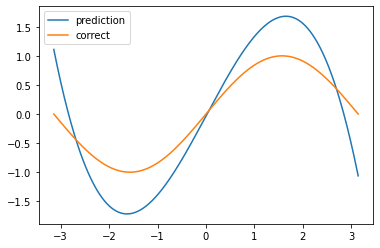

In [59]:
show_result()

In [60]:
# Train for longer
for t in range(2000):
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = np.square(y_pred - y).sum()
    if t % 400 == 399:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

399 107.28849044506575
799 27.659233187065496
1199 12.423428526805926
1599 9.507612362566807
1999 8.949414179982128


Result: y = -0.001069355843647951 + 0.8678765593362913 x + 0.00018448167718731768 x^2 + -0.09491434770827006 x^3


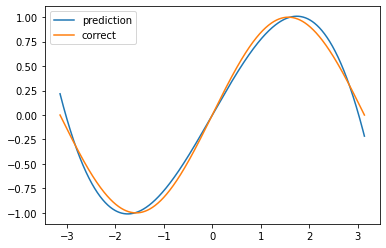

In [61]:
show_result()

# PyTorch: Tensors

How do we do the above with PyTorch?

In [62]:
import random
import torch
import math

In [63]:
dtype = torch.float
device = torch.device("cuda:0")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6

In [64]:
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 500 == 499:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

499 372.13641357421875
999 55.8402099609375
1499 14.95560359954834
1999 9.627580642700195


In [65]:
def show_result_pytorch():
    print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
    x_data = np.linspace(-math.pi, math.pi, 2000)
    y_data = a.item() + b.item()*x_data + c.item()*np.power(x_data,2) + d.item()*np.power(x_data,3)
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, label='prediction')
    ax.plot(x_data, np.sin(x_data), label='correct')
    ax.legend()
    plt.show()

Result: y = 0.011568470858037472 + 0.8311883807182312 x + -0.001995756523683667 x^2 + -0.0896957740187645 x^3


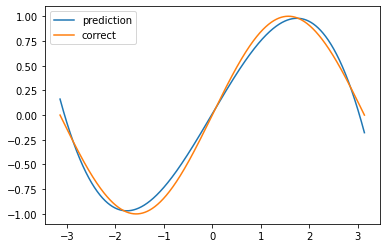

In [66]:
show_result_pytorch()

# PyTorch: Tensors and autograd

Tensors can also be used to keep track of gradients for us automatically.

In [67]:
dtype = torch.float
device = torch.device("cuda:0")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6

In [68]:
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum()
    if t % 400 == 399:
        print(t, loss.item())

    loss.backward()

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

399 256.4771423339844
799 70.5996322631836
1199 24.248653411865234
1599 12.675140380859375
1999 9.78238582611084


# PyTorch: Sequential Models

In [69]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Let's prepare the tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# There are other loss functions in torch.nn
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6

In [70]:
for t in range(2000):
    # Can call model as function
    y_pred = model(xx)

    loss = loss_fn(y_pred, y)
    if t % 1000 == 999:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss
    loss.backward()

    # Update the weights using gradient descent.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad


999 40.84174728393555
1999 9.350507736206055


In [71]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'''Result: y = {linear_layer.bias.item()}
    + {linear_layer.weight[:, 0].item()} x 
    + {linear_layer.weight[:, 1].item()} x^2
    + {linear_layer.weight[:, 2].item()} x^3''')

Result: y = 0.006995325908064842 + 0.8352301716804504 x + -0.001206810469739139 x^2 + -0.09027068316936493 x^3


# PyTorch: optimization

PyTorch can handle the optimization process as well!

In [72]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [73]:
learning_rate = 1e-3
# There are many options here in the torch.optim package
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    y_pred = model(xx)

    loss = loss_fn(y_pred, y)
    if t % 400 == 399:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

399 763.6348876953125
799 266.8685302734375
1199 44.272300720214844
1599 8.964552879333496
1999 8.920526504516602


In [74]:
linear_layer = model[0]
print(f'''Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x
    + {linear_layer.weight[:, 1].item()} x^2 
    + {linear_layer.weight[:, 2].item()} x^3''')

Result: y = -0.0004978078068234026 + 0.8572172522544861 x + -0.0004978086217306554 x^2 + -0.09282690286636353 x^3


# PyTorch: Custom nn Modules

In [75]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

In [76]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    y_pred = model(x)

    loss = criterion(y_pred, y)
    if t % 400 == 399:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

399 925.420654296875
799 185.6490478515625
1199 43.02363204956055
1599 15.456828117370605
1999 10.111635208129883


In [77]:
def show_result_module():
    x_data = np.linspace(-math.pi, math.pi, 2000)
    y_data = model.a.item() + model.b.item()*x_data 
        + model.c.item()*np.power(x_data,2)
        + model.d.item()*np.power(x_data,3)
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, label='prediction')
    ax.plot(x_data, np.sin(x_data), label='correct')
    ax.legend()
    plt.show()

Result: y = -0.010863000527024269 + 0.8232194185256958 x + 0.00187405024189502 x^2 + -0.0885622575879097 x^3


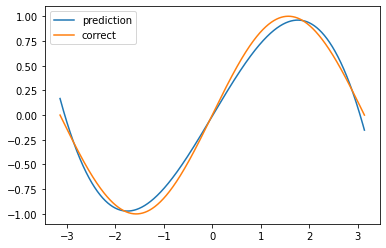

In [78]:
print(f'Result: {model.string()}')
show_result_module()

# References
 - NumPy and PyTorch examples are from: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
 - Random forests: https://towardsdatascience.com/understanding-random-forest-58381e0602d2
 - Underfitting and overfitting image (accessed on 2019-06-06): https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76

# Exercises
<https://colab.research.google.com/github/jonathanfrawley/machine_learning_course/blob/main/exercises/exercises_01.ipynb>